In [1]:
%matplotlib inline
%matplotlib notebook

In [2]:
!pip install plotly

In [23]:
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go
import random as rand
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
from scipy.special import betainc
import matplotlib.pyplot as plt

import numpy as np
import colorsys

from matplotlib.tri import Triangulation

from mpl_toolkits.mplot3d.art3d import Poly3DCollection

In [4]:
#volume sphere rayon 1
def nSphereVolume(dim, iterations):
    count_in_sphere = 0

    for count_loops in range(iterations):
        point = np.random.uniform(-1.0, 1.0, dim)
        distance = np.linalg.norm(point)
        if distance < 1.0:
            count_in_sphere += 1

    return np.power(2.0, dim) * (count_in_sphere / iterations)

print(nSphereVolume(3, 100000))

4.21896


In [ ]:
for i in range(1, 10):
    print(nSphereVolume(i, 1000000))

In [5]:
def n_dim_cone_volume(iterations, c, theta, dim):
    count_in_cone = 0
    point_cone = []
    
    for count_loops in range(iterations):
        
        point = np.random.uniform(c-1, c+1, dim)
        z = point[0]
        point[0] = 0
        S = 0
        for p in point:
            S = S + p**2
        rho = np.sqrt(S)
        point[0] = z

        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone += 1
            point_cone.append(point)
        
    return np.power(2.0, dim) * (count_in_cone / iterations), point_cone

In [5]:
result_2 = n_dim_cone_volume(100000, 0, np.pi/4, 2)
result_3 = n_dim_cone_volume(100000, 0, np.pi/4, 3)

print(result_2[0], result_3[0])


1.00848 1.04568


<IPython.core.display.Javascript object>


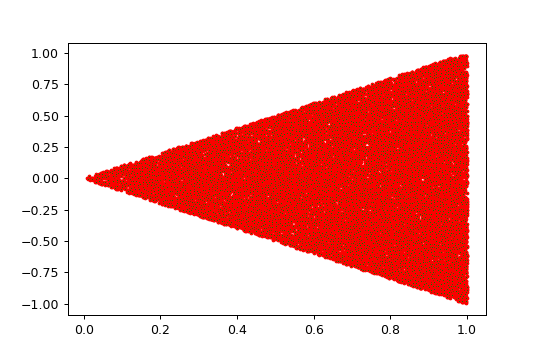

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceed

In [8]:
for point in result_2[1]:
    plt.plot(point[0], point[1], marker="o", markersize=2, markeredgecolor="red", markerfacecolor="green")
    plt.show()


<IPython.core.display.Javascript object>


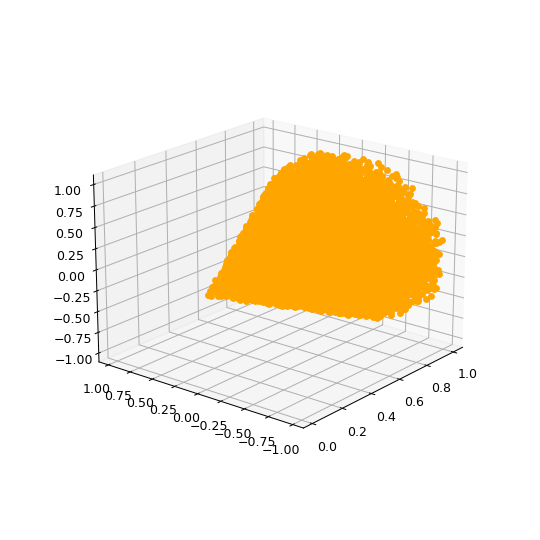

In [6]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
for point in result_3[1]:
    ax.scatter(point[0], point[1], point[2], color = 'orange')

$${\displaystyle V_{n}(R)={\frac {2(2\pi )^{(n-1)/2}}{n!!}}R^{n}.}$$

In [6]:
def single_noise_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim):
    count_in_sphere = 0
    count_in_cone = 0
    points_sphere = []
    points_cone = []

    for count_loops in range(iterations):
        point = np.random.uniform(c - rayon, c + rayon, dim)
        distance = np.linalg.norm(point)
        if distance < rayon:
            points_sphere.append(point)
            count_in_sphere += 1
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    #for i in points_sphere:
        #ax.scatter(i[0], i[1], i[2], color = 'green')
    
    vol_boule = np.power(2*rayon, dim) * (count_in_sphere / iterations)
    
    for point in points_sphere:
        x1 = point[0]
        z = x1
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S) 
        if (z > c) and (rho <= z*np.tan(theta)):
            count_in_cone += 1
            points_cone.append(point)
    vol_in_cone = vol_boule * (count_in_cone/count_in_sphere)
    
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    #for i in points_cone:
        #ax.scatter(i[0], i[1], i[2], color = 'orange')
    vol_out_cone = vol_boule - vol_in_cone
    
    #probabilité que les points de la boule ne soient pas dans le cone:
    p1 = 1 - count_in_cone/count_in_sphere
    
    #on déplace de epsilon vers la droite de l'axe du cone
    a = (dim + 1)/2 
    b = 1/2
    x = 1 - (epsilon/(2*rayon))**2
    Vcap = (1/2) * vol_boule * betainc(a, b, x) #On utilise la fonction beta incomplete de la librairie scipy.
    
    Psn = p1 - 1 + 2*(Vcap/vol_boule)
    PSn2 = p1 - 1 + betainc(a, b, x)

    return Psn

In [16]:
results_dim = []
for i in range(1, 10):
    results_dim.append(single_noise_déplacement_epsilon_uniforme_n_dim(1, 0.5, 0, np.pi/4, 1000000, i))

<IPython.core.display.Javascript object>


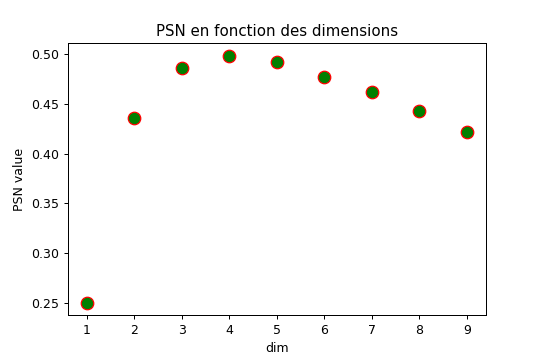

Text(0.5, 1.0, 'PSN en fonction des dimensions')

In [18]:
fig1, ax1 = plt.subplots()
for i in range(1, 10):
    ax1.plot(i, results_dim[i-1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
ax1.set_xlabel("dim")
ax1.set_ylabel("PSN value")
ax1.set_title("PSN en fonction des dimensions")

In [8]:
print(results_dim[2])

0.48566852631010626


In [9]:
def P_true_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim):
    #On parle de vol_deplace/vol_boule où vol_déplacé sont les points tels que après une translation epsilon soient dans la boule
    #mais pas dans le cone.
    count_in_sphere = 0
    count_in_transl = 0
    points_sphere = []
    points_transl = []
    points_not_in_cone = []
    points_in_cone = []
    count_not_in_cone = 0
    
    #Set de points dans la boule:
    for count_loops in range(iterations):
        point = np.random.uniform(c - rayon, c + rayon, dim)
        distance = np.linalg.norm(point)
        if distance < rayon:
            points_sphere.append(point)
            count_in_sphere += 1
    vol_boule = np.power(2*rayon, dim) * (count_in_sphere / iterations)
    
    #fig = plt.figure(figsize=(6, 6))
    #ax = fig.add_subplot(111, projection='3d')
    #for i in points_sphere:
        #ax.scatter(i[0], i[1], i[2], color = 'orange')
        
    #on fait la translation sur x
    for i in points_sphere:
        i[0] = i[0] + epsilon
    
    #on teste si on est en dehors ou non du cone:
    for point in points_sphere:
        x1 = point[0]
        z = x1
        S = 0
        for i in range(len(point)-1):
            S += point[i + 1]**2
        rho = np.sqrt(S)
        if (z > c) and (rho <= z*np.tan(theta)):
            points_in_cone.append(point)
        else:
            count_not_in_cone += 1
            points_not_in_cone.append(point)
    #on calcule alors le volume:
    vol_deplace = vol_boule*(count_not_in_cone/count_in_sphere)
        
    p_true = vol_deplace/vol_boule
        
    #for i in points_not_in_cone:
        #ax.scatter(i[0], i[1], i[2], color = 'green')
        
    return p_true

In [17]:
results_dim_p = []
for i in range(1, 10):
    results_dim_p.append(P_true_déplacement_epsilon_uniforme_n_dim(1, 0.5, 0, np.pi/4, 1000000, i))


<IPython.core.display.Javascript object>


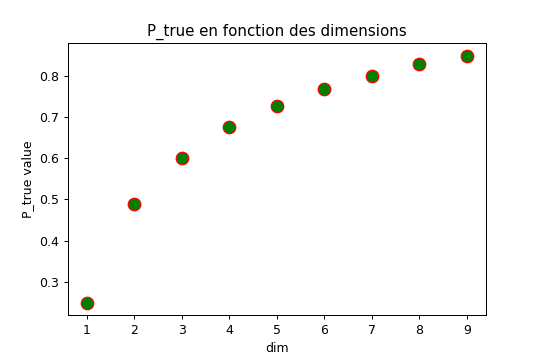

Text(0.5, 1.0, 'P_true en fonction des dimensions')

In [19]:
fig2, ax2 = plt.subplots()
for i in range(1, 10):
    ax2.plot(i, results_dim_p[i-1], marker="o", markersize=10, markeredgecolor="red", markerfacecolor="green")
ax2.set_xlabel("dim")
ax2.set_ylabel("P_true value")
ax2.set_title("P_true en fonction des dimensions")

In [20]:
def diff_p_true_p_single_noise_n_dim(rayon, epsilon, c, theta, iterations, dim):
    return(P_true_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim) - single_noise_déplacement_epsilon_uniforme_n_dim(rayon, epsilon, c, theta, iterations, dim))

In [21]:
def graphe_n_dim_thetas_var(n_theta, rayon, epsilon, c, iterations, dim):
    thetas = np.linspace(0, np.pi/2, n_theta, endpoint = False)
    liste = []
    for th in thetas:
        liste.append(diff_p_true_p_single_noise_n_dim(rayon, epsilon, c, th, iterations, dim))
    fig, ax = plt.subplots()
    ax.plot(thetas, liste)
    ax.set_xlabel("Thetas")
    ax.set_ylabel('P_true - P_single_noise')
    ax.set_title('Différence entre P_true et P_single_noise a dimension ' + str(dim))


<IPython.core.display.Javascript object>


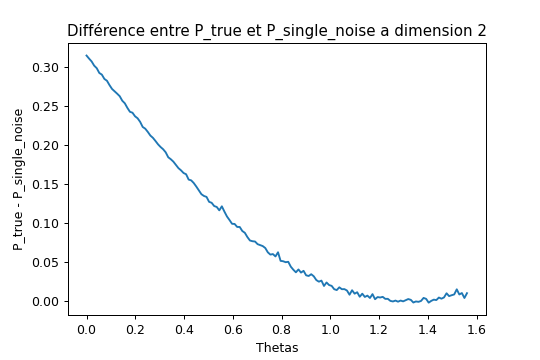

<IPython.core.display.Javascript object>


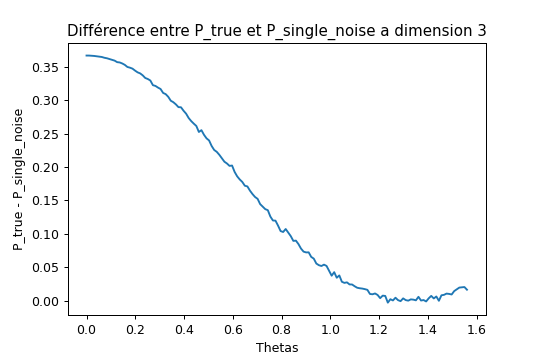

<IPython.core.display.Javascript object>


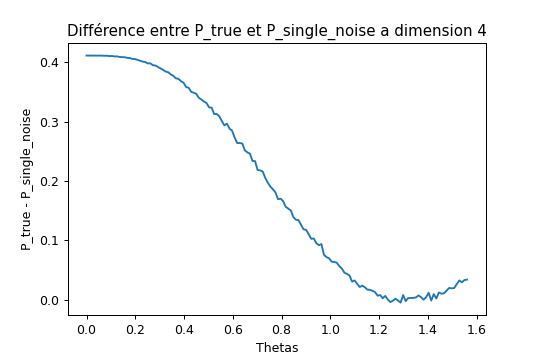

In [22]:
for i in range(2, 5):
    graphe_n_dim_thetas_var(150, 1, 0.5, 0, 100000, i)

In [34]:
def graphe_n_dim_dims_var(rayon, epsilon, c, thetas, iterations, dim_list):
    fig, ax = plt.subplots()
    liste_res = []
    for th in thetas:
        liste = []
        for i in dim_list:
            liste.append(diff_p_true_p_single_noise_n_dim(rayon, epsilon, c, th, iterations, i))
        liste_res.append(liste[:])
        
    for i in range(len(thetas)):
        
        ax.plot(dim_list, liste_res[i], label = 'theta: ' + str(thetas[i]))
        ax.legend()
    ax.set_xlabel("Dimensions")
    ax.set_ylabel('P_true - P_single_noise')
    ax.set_title('Différence entre P_true et P_single_noise a thetas fixés ')

<IPython.core.display.Javascript object>


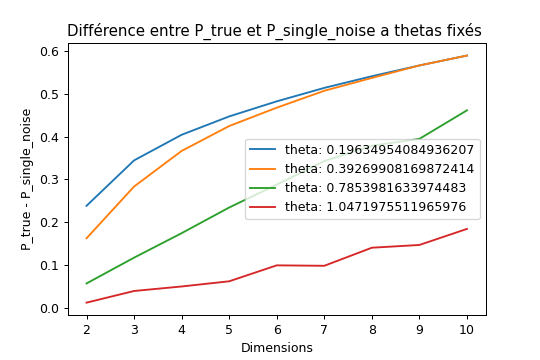

In [35]:
dim_list = [2, 3, 4, 5, 6, 7, 8, 9, 10]
thetas = [np.pi/16, np.pi/8, np.pi/4, np.pi/3]
graphe_n_dim_dims_var(1, 0.5, 0, thetas, 100000, dim_list)